In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import pickle

from pmdarima.arima import auto_arima

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Mount GDrive folders
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set home directory
import os
home_dir = "/content/drive/MyDrive/Eskwelabs/Capstone/data" # insert your home directory here
os.chdir(home_dir)

In [ ]:
charts_df = pd.read_csv('consolidated_csv_01ANGAT_M.csv')
# transform date column into a datetime column
charts_df['RUN_TIME'] = pd.to_datetime(charts_df['RUN_TIME'])
charts_df = charts_df.set_index('RUN_TIME')
charts_df.head()

,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,PRICE1,QUANTITY1,...,RR_BREAK_QUANTITY3,RR_UP3,RR_DOWN3,RR_BREAK_QUANTITY4,RR_UP4,RR_DOWN4,RR_BREAK_QUANTITY5,RR_UP5,RR_DOWN5,Unnamed: 46
RUN_TIME,,,,,,,,,,,,,,,,,,,,,
2021-06-26 00:00:00,RTD,CLUZ,NLUZON,01ANGAT_M,06/26/2021 12:05:00 AM,06/26/2021,06/26/2021 12:05:00 AM,AHC,16000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-26 00:05:00,RTD,CLUZ,NLUZON,01ANGAT_M,06/26/2021 12:10:00 AM,06/26/2021 12:05:00 AM,06/26/2021 12:10:00 AM,AHC,16000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-26 00:10:00,RTD,CLUZ,NLUZON,01ANGAT_M,06/26/2021 12:15:00 AM,06/26/2021 12:10:00 AM,06/26/2021 12:15:00 AM,AHC,16000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-26 00:15:00,RTD,CLUZ,NLUZON,01ANGAT_M,06/26/2021 12:20:00 AM,06/26/2021 12:15:00 AM,06/26/2021 12:20:00 AM,AHC,16000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-26 00:20:00,RTD,CLUZ,NLUZON,01ANGAT_M,06/26/2021 12:25:00 AM,06/26/2021 12:20:00 AM,06/26/2021 12:25:00 AM,AHC,16000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# # Create a sample DataFrame
# testing = {'Column1': [1, 4, 3],
#         'Column2': [2, 5, 1],
#         'Column3': [6, 2, 8]}

# testing_df = pd.DataFrame(testing)

# # Find the maximum value in each row
# max_values_in_rows = testing_df.max(axis=1)

# # Print the maximum values for each row
# print(max_values_in_rows)

In [ ]:
# Specify columns for which you want to find the maximum value
selected_columns = ['QUANTITY1', 'QUANTITY2', 'QUANTITY3', 'QUANTITY4','QUANTITY5', 'QUANTITY6', 'QUANTITY7', 'QUANTITY8', 'QUANTITY9', 'QUANTITY10', 'QUANTITY11']

# # Find the maximum value in each row for the selected columns
# max_values_in_selected_columns = charts_df[selected_columns].max(axis=1)

# Add a new column 'max_value' with the maximum value in each row
charts_df['MAX_QUANTITY'] = charts_df[selected_columns].max(axis=1)
charts_df['MAX_QUANTITY'] = charts_df['MAX_QUANTITY'].astype(int)



In [ ]:
charts_df

,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,PRICE1,QUANTITY1,...,RR_UP3,RR_DOWN3,RR_BREAK_QUANTITY4,RR_UP4,RR_DOWN4,RR_BREAK_QUANTITY5,RR_UP5,RR_DOWN5,Unnamed: 46,MAX_QUANTITY
RUN_TIME,,,,,,,,,,,,,,,,,,,,,
2021-06-26 00:00:00,RTD,CLUZ,NLUZON,01ANGAT_M,06/26/2021 12:05:00 AM,06/26/2021,06/26/2021 12:05:00 AM,AHC,16000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160
2021-06-26 00:05:00,RTD,CLUZ,NLUZON,01ANGAT_M,06/26/2021 12:10:00 AM,06/26/2021 12:05:00 AM,06/26/2021 12:10:00 AM,AHC,16000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160
2021-06-26 00:10:00,RTD,CLUZ,NLUZON,01ANGAT_M,06/26/2021 12:15:00 AM,06/26/2021 12:10:00 AM,06/26/2021 12:15:00 AM,AHC,16000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160
2021-06-26 00:15:00,RTD,CLUZ,NLUZON,01ANGAT_M,06/26/2021 12:20:00 AM,06/26/2021 12:15:00 AM,06/26/2021 12:20:00 AM,AHC,16000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160
2021-06-26 00:20:00,RTD,CLUZ,NLUZON,01ANGAT_M,06/26/2021 12:25:00 AM,06/26/2021 12:20:00 AM,06/26/2021 12:25:00 AM,AHC,16000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25 23:35:00,RTD,CLUZ,NLUZON,01ANGAT_M,09/25/2023 11:40:00 PM,09/25/2023 11:35:00 PM,09/25/2023 11:40:00 PM,AHC,25000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
2023-09-25 23:40:00,RTD,CLUZ,NLUZON,01ANGAT_M,09/25/2023 11:45:00 PM,09/25/2023 11:40:00 PM,09/25/2023 11:45:00 PM,AHC,25000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
2023-09-25 23:45:00,RTD,CLUZ,NLUZON,01ANGAT_M,09/25/2023 11:50:00 PM,09/25/2023 11:45:00 PM,09/25/2023 11:50:00 PM,AHC,25000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100


In [ ]:
charts_df[charts_df.index.duplicated()]

,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,PRICE1,QUANTITY1,...,RR_UP3,RR_DOWN3,RR_BREAK_QUANTITY4,RR_UP4,RR_DOWN4,RR_BREAK_QUANTITY5,RR_UP5,RR_DOWN5,Unnamed: 46,MAX_QUANTITY
RUN_TIME,,,,,,,,,,,,,,,,,,,,,
2022-12-20 18:20:00,RTD,CLUZ,NLUZON,01ANGAT_M,12/20/2022 6:25:00 PM,12/20/2022 6:20:00 PM,12/20/2022 6:25:00 PM,AHC,1000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
2022-12-20 18:20:00,RTD,CLUZ,NLUZON,01ANGAT_M,12/20/2022 6:25:00 PM,12/20/2022 6:20:00 PM,12/20/2022 6:25:00 PM,AHC,1000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
2022-12-20 18:20:00,RTD,CLUZ,NLUZON,01ANGAT_M,12/20/2022 6:25:00 PM,12/20/2022 6:20:00 PM,12/20/2022 6:25:00 PM,AHC,1000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
2022-12-20 18:20:00,RTD,CLUZ,NLUZON,01ANGAT_M,12/20/2022 6:25:00 PM,12/20/2022 6:20:00 PM,12/20/2022 6:25:00 PM,AHC,1000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
2022-12-20 18:20:00,RTD,CLUZ,NLUZON,01ANGAT_M,12/20/2022 6:25:00 PM,12/20/2022 6:20:00 PM,12/20/2022 6:25:00 PM,AHC,1000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
2022-12-20 18:20:00,RTD,CLUZ,NLUZON,01ANGAT_M,12/20/2022 6:25:00 PM,12/20/2022 6:20:00 PM,12/20/2022 6:25:00 PM,AHC,1000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
2022-12-20 18:20:00,RTD,CLUZ,NLUZON,01ANGAT_M,12/20/2022 6:25:00 PM,12/20/2022 6:20:00 PM,12/20/2022 6:25:00 PM,AHC,1000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
2022-12-20 18:20:00,RTD,CLUZ,NLUZON,01ANGAT_M,12/20/2022 6:25:00 PM,12/20/2022 6:20:00 PM,12/20/2022 6:25:00 PM,AHC,1000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
2022-12-20 18:20:00,RTD,CLUZ,NLUZON,01ANGAT_M,12/20/2022 6:25:00 PM,12/20/2022 6:20:00 PM,12/20/2022 6:25:00 PM,AHC,1000.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100


In [ ]:
charts_df = charts_df[~charts_df.index.duplicated()]

<Axes: xlabel='RUN_TIME'>

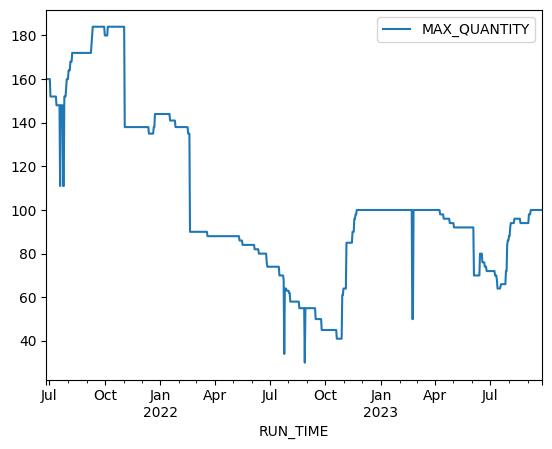

In [ ]:
data = charts_df[['MAX_QUANTITY']]
data = data.asfreq('D') # Add to complete dates

data['MAX_QUANTITY'] = data['MAX_QUANTITY'].fillna(method='ffill')
data[['MAX_QUANTITY']].plot()

In [ ]:
data


,MAX_QUANTITY
RUN_TIME,
2021-06-26,160.0
2021-06-27,160.0
2021-06-28,160.0
2021-06-29,160.0
2021-06-30,160.0
...,...
2023-09-21,100.0
2023-09-22,100.0
2023-09-23,100.0


In [ ]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data)

(0.8191005439105771, True)

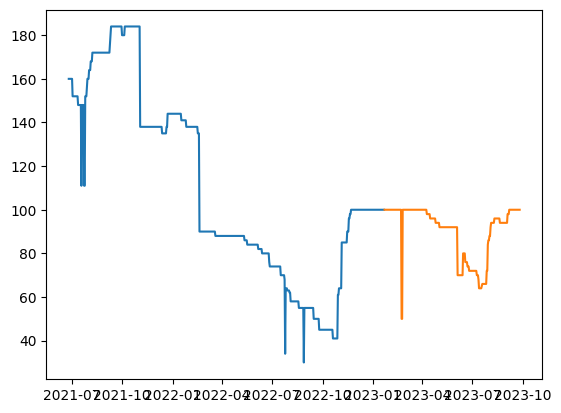

In [ ]:
train_data = data[:round(len(data)*0.7)]
test_data = data[round(len(data)*0.7):]
plt.plot(train_data)
plt.plot(test_data)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def show_errors(y_true, y_pred):
    return pd.DataFrame({'RMSE': root_mean_squared_error(y_true,y_pred),\
                                            'MAE':mean_absolute_error(y_true,y_pred),\
                                            'MAPE': mean_absolute_percentage_error(y_true,y_pred)}, index=[0])

In [ ]:
arima_model = auto_arima(train_data, start_p=0, d=1, start_q=0,
                         max_p=7, max_d=2,max_q=7, start_P=0,
                         D=1, start_Q=0, max_P=7, max_D=2, max_Q=7, m=12, seasonal=True,
                         error_action='warn', trace=True,
                         supress_warnings=True, stepwise=True,
                         random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3822.388, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3621.323, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.85 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3800.183, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3554.097, Time=0.73 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=3527.141, Time=1.29 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=3509.541, Time=2.32 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=3496.089, Time=6.03 sec
 ARIMA(1,1,0)(6,1,0)[12]             : AIC=3488.364, Time=7.68 sec
 ARIMA(1,1,0)(7,1,0)[12]             : AIC=3489.303, Time=13.64 sec
 ARIMA(1,1,0)(6,1,1)[12]             : AIC=3479.696, Time=33.40 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=17.52 sec
 ARIMA(1,1,0)(7,1,1)[12]             : AIC=3481.379, Time=47.92 sec
 ARIMA(1,1,0)(6,1,2)[12]             : AIC=inf, Time=34.48 sec
 ARIMA(1,1,0)(5,1,2)[12]     

In [ ]:
arima_model.summary()

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods=700),index=test_data.index)
prediction.columns = ['predicted_streams']
prediction

In [ ]:
plt.figure(figsize=(8,5))
# plt.plot(train_data, label="Training")
# plt.plot(test_data, label="Test")
plt.plot(train_data)
plt.plot(prediction, label="Predicted")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train_data, label="Training")
plt.plot(test_data, label="Test")
plt.plot(prediction, label="Predicted")
plt.legend()
plt.show()

In [ ]:
test_data

In [ ]:
show_errors(test_data['MAX_QUANTITY'], prediction['predicted_streams'])

In [ ]:
from sklearn.metrics import r2_score

r2_score(test_data['MAX_QUANTITY'], prediction['predicted_streams'])

In [ ]:
forecast = arima_model.fit_predict(data, n_periods=90)

In [ ]:
# plt.plot(forecast)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train_data, label="Training")
plt.plot(test_data, label="Test")
plt.plot(prediction, label="Predicted")
plt.plot(forecast, label="Forecasted")
plt.legend()
plt.show()

In [ ]:
# joblib.dump(arima_model, 'arima.pkl')

In [ ]:
# history = [x for x in X]
# day = 1
# for yhat in forecast:
#  inverted = inverse_difference(history, yhat, days_in_year)
#  print('Day %d: %f' % (day, inverted))
#  history.append(inverted)
#  day += 1

In [ ]:
# model = arima_model  # seeded from the model we've already fit

# def forecast_one_step():
#     fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
#     return (
#         fc.tolist()[0],
#         np.asarray(conf_int).tolist()[0])

# forecasts = []
# confidence_intervals = []

# for new_ob in test_data:
#     fc, conf = forecast_one_step()
#     forecasts.append(fc)
#     confidence_intervals.append(conf)

#     # Updates the existing model with a small number of MLE steps
#     model.update(new_ob)

# print(f"Mean squared error: {mean_squared_error(test_data, forecasts)}")


In [ ]:
# fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# # --------------------- Actual vs. Predicted --------------------------
# axes[0].plot(y_train, color='blue', label='Training Data')
# axes[0].plot(test_data.index, forecasts, color='green', marker='o',
#              label='Predicted Price')

# axes[0].plot(test_data.index, y_test, color='red', label='Actual Price')
# axes[0].set_title('Microsoft Prices Prediction')
# axes[0].set_xlabel('Dates')
# axes[0].set_ylabel('Prices')

# axes[0].set_xticks(np.arange(0, 7982, 1300).tolist(), df['Date'][0:7982:1300].tolist())
# axes[0].legend()


# # ------------------ Predicted with confidence intervals ----------------
# axes[1].plot(y_train, color='blue', label='Training Data')
# axes[1].plot(test_data.index, forecasts, color='green',
#              label='Predicted Price')

# axes[1].set_title('Prices Predictions & Confidence Intervals')
# axes[1].set_xlabel('Dates')
# axes[1].set_ylabel('Prices')

# conf_int = np.asarray(confidence_intervals)
# axes[1].fill_between(test_data.index,
#                      conf_int[:, 0], conf_int[:, 1],
#                      alpha=0.9, color='orange',
#                      label="Confidence Intervals")

# axes[1].set_xticks(np.arange(0, 7982, 1300).tolist(), df['Date'][0:7982:1300].tolist())
# axes[1].legend()

In [ ]:
# N = test_data.shape[0]
# forecasts = arima_model.predict(N)
# in_sample_forecast = arima_model.predict_in_sample()

In [ ]:
# model_fit = auto_arima(data, start_p=0, d=1, start_q=0,
#                          max_p=5, max_d=2,max_q=5, start_P=0,
#                          D=1, start_Q=0, max_P=5, max_D=2, max_Q=5, m=12, seasonal=True,
#                          error_action='warn', trace=True,
#                          supress_warnings=True, stepwise=True,
#                          random_state=20, n_fits=50)

In [ ]:
# prediction2 = pd.DataFrame(model_fit.predict(n_periods=100),index=data.index)
# prediction2.columns = ['predicted_streams']
# prediction2

In [ ]:
# plt.figure(figsize=(8,5))
# plt.plot(train_data, label="Training")
# plt.plot(test_data, label="Test")
# plt.plot(prediction, label="Predicted")
# plt.legend()
# plt.show()

In [ ]:
# from sklearn.metrics import r2_score

# r2_score(data['streams'], prediction2['predicted_streams'])

In [ ]:
# joblib.dump(arima_model, 'arima.pkl')

In [ ]:
# from pmdarima.arima import auto_arima
# from pmdarima.datasets import load_lynx
# import numpy as np

# # For serialization:
# import joblib
# import pickle

# # Load data and fit a model
# y = load_lynx()
# arima = auto_arima(y, seasonal=True)

# # Serialize with Pickle
# with open('arima.pkl', 'wb') as pkl:
#     pickle.dump(arima, pkl)

# # You can still make predictions from the model at this point
# arima.predict(n_periods=5)

# # Now read it back and make a prediction
# with open('arima.pkl', 'rb') as pkl:
#     pickle_preds = pickle.load(pkl).predict(n_periods=5)

# # Or maybe joblib tickles your fancy
# joblib.dump(arima, 'arima.pkl')
# joblib_preds = joblib.load('arima.pkl').predict(n_periods=5)

# # show they're the same
# np.allclose(pickle_preds, joblib_preds)